In [45]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , RobustScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import PolynomialFeatures

In [46]:
df = pd.read_csv('../data/gold.csv')

## variables remove

In [47]:
df['distance_accessibility_ratio'] = df['distances_to_employment_centres'] / df['accessibility_to_highways']
df['crime_rate_black_population_ratio'] = df['crime_rate'] / df['black_population']

In [48]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
corr

,crime_rate,residential_zone_pct,business_acres_pct,charles_river_dummy,nitric_oxides_concentration,average_rooms,age,distances_to_employment_centres,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,black_population,lower_status_pct,median_home_value,distance_accessibility_ratio,crime_rate_black_population_ratio
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.275256,0.281137
residential_zone_pct,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.552166,-0.051120
business_acres_pct,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.511998,0.106311
charles_river_dummy,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.055980,-0.027403
nitric_oxides_concentration,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.532498,0.097548
average_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.159721,-0.019441
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.500875,0.092657
distances_to_employment_centres,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.650367,-0.092707
accessibility_to_highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.489416,0.172831
property_tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.435371,0.159441


In [49]:
# Drop the variables from the dataframe
df = df.drop(['charles_river_dummy'] , axis = 1)

In [50]:
df.head()

,crime_rate,residential_zone_pct,business_acres_pct,nitric_oxides_concentration,average_rooms,age,distances_to_employment_centres,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,black_population,lower_status_pct,median_home_value,distance_accessibility_ratio,crime_rate_black_population_ratio
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,4.090000,0.000016
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2.483550,0.000069
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,2.483550,0.000069
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,2.020733,0.000082
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,2.020733,0.000174


In [51]:
# Define the features and the target
X = df.drop('median_home_value', axis=1)
y = df['median_home_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
# Define the pipeline with the best model
pipeline = Pipeline([
    # ('PolynomialFeatures', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', ExtraTreesRegressor(max_depth=15 , random_state=42 , n_estimators=300))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

In [53]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Absolute Error:  1.9464511196934156
Root Mean Squared Error:  2.8492933575551356
R2 Score:  0.8927241985604408


In [54]:
# Log experiment with MLflow

mlflow.set_tracking_uri("http://localhost:5000")
with mlflow.start_run():
    mlflow.log_param("max_depth", 15)
    mlflow.log_param("n_estimators", 300)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(pipeline, "model")

### SHAP VALUES

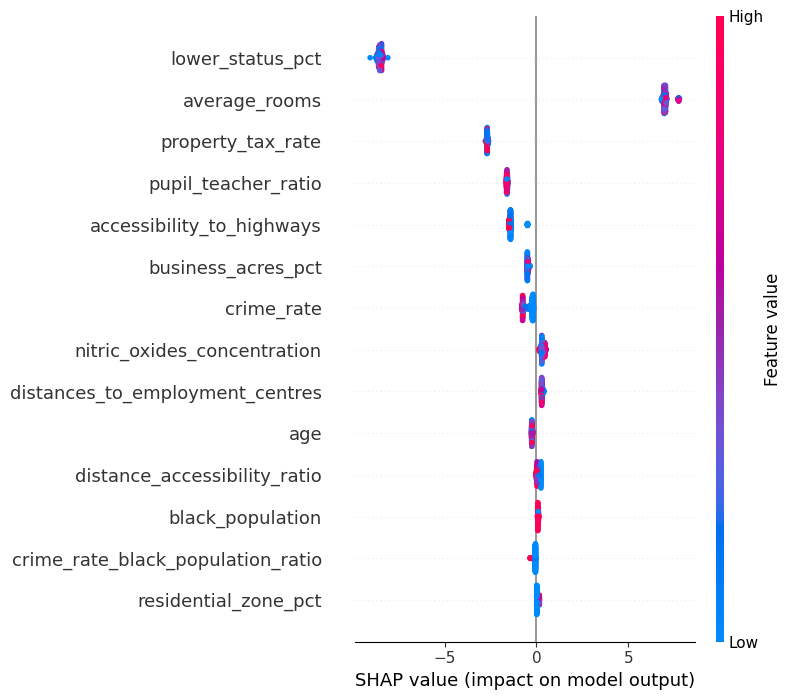

In [55]:
import shap
# Calculate SHAP values
explainer = shap.Explainer(pipeline['model'])
shap_values = explainer.shap_values(X_train)


# Plot summary plot
shap.summary_plot(shap_values, X_train)